<a href="https://colab.research.google.com/github/AndresMontesDeOca/Laboratorio3/blob/main/Labo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio III

## Librerias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
# warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore')

# Ajustar la opción para mostrar más filas
# pd.set_option('display.max_rows', None)

# Si también quieres mostrar más columnas
# pd.set_option('display.max_columns', None)


# Vamos a suprimir la notacion cientifica
pd.set_option("display.float_format", lambda x:"%.2f" %x)


## Funciones Auxiliares

In [ ]:
# Funciones Auxiliares
def plot_cumsum(data, periodo_start, periodo_end, threshold_percentage):
    # Filtrar datos y agrupar por product_id
    filtered_data = data[(data['periodo'] >= periodo_start) & (data['periodo'] <= periodo_end)]

    # Sumar las ventas por producto y ordenar de mayor a menor
    total_sales = filtered_data.groupby('product_id')['tn'].sum().sort_values(ascending=False)

    # Calcular la suma acumulada y el porcentaje acumulado
    total_sales_cumsum = total_sales.cumsum()
    total_sales_cumsum_percentage = total_sales_cumsum / total_sales.sum() * 100

    # Crear un índice basado en el conteo de productos
    total_sales_cumsum_percentage.index = range(1, len(total_sales_cumsum_percentage) + 1)

    # Crear la gráfica de suma acumulada
    plt.figure(figsize=(14, 10))
    plt.plot(total_sales_cumsum_percentage, marker='o', linestyle='-')
    plt.xlabel('Number of Products')
    plt.ylabel('Cumulative Percentage of Total Sales')
    plt.title(f'Cumulative Sales Percentage by Number of Products up to {threshold_percentage*100}%')
    plt.grid(True)
    plt.axhline(y=threshold_percentage * 100, color='r', linestyle='--')  # Línea de referencia
    plt.show()

    # Calcular el umbral en porcentaje
    threshold = threshold_percentage * 100
    top_x_products = total_sales_cumsum_percentage[total_sales_cumsum_percentage <= threshold]

    # Crear un DataFrame con el número de posición, product_id, y cumsum
    result_df = pd.DataFrame({
        # 'Position': range(1, len(top_x_products) + 1),
        'Product_ID': total_sales.index[top_x_products.index - 1],
        'Cumulative_Percentage': top_x_products.values
    })


    display(result_df)

## Carga Datos

In [2]:
# Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# # Ventas
id = "158aOjqxaNO8l97yA6VWJkek_15YVLMhs"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('sell-in.txt')
data_ventas = pd.read_csv("sell-in.txt", sep="\t")
data_ventas['periodo'] = pd.to_datetime(data_ventas['periodo'], format='%Y%m')
data = data_ventas.copy()

# # Productos
id = "15JS_k86LS0sgJXma7BOVXWlyNcMwxdhE"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tb_productos.txt')
data_productos = pd.read_csv("tb_productos.txt", sep="\t")

# # Stocks
id = "15EV-8f_U7onpA1AcTxxXeD-z8yVR4fQu"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tb_stocks.txt')
data_stocks = pd.read_csv("tb_stocks.txt", sep="\t")
data_stocks['periodo'] = pd.to_datetime(data_stocks['periodo'], format='%Y%m')

# # Productos a predecir
id = "15LjADctFVwjzQFJvfJGFTEdgZx9xCoId"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('productos_a_predecir.txt')
data_productos_a_predecir = pd.read_csv("productos_a_predecir.txt", sep="\t")



## Clase 2

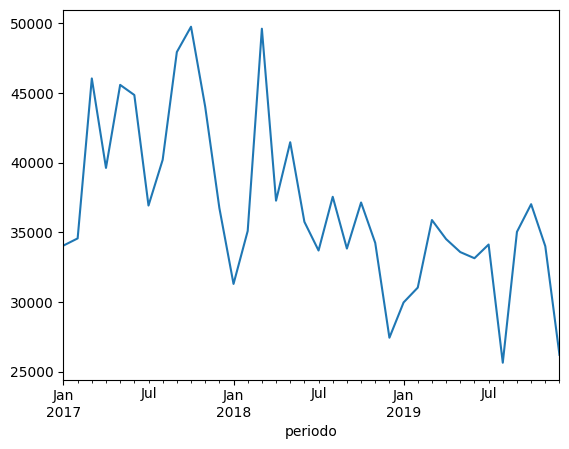

In [3]:
# Generamos la Serie de Tiempo con la suma en toneladas vendidas por mes
data_ts = data_ventas.groupby('periodo').sum()['tn']
data_ts.plot()

plt.show()

### Predicciones Mayo 2019

In [4]:
# Con los datos de Marzo 2019, predecir cuantas ventas va a haber en Mayo 2019 y calcular el error
data

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,2017-01-01,10234,20524,0,2,0.05,0.05
1,2017-01-01,10032,20524,0,1,0.14,0.14
2,2017-01-01,10217,20524,0,1,0.03,0.03
3,2017-01-01,10125,20524,0,1,0.02,0.02
4,2017-01-01,10012,20524,0,11,1.54,1.54
...,...,...,...,...,...,...,...
2945813,2019-12-01,10105,20853,0,1,0.02,0.02
2945814,2019-12-01,10092,20853,0,1,0.01,0.01
2945815,2019-12-01,10006,20853,0,7,0.03,0.03
2945816,2019-12-01,10018,20853,0,4,0.02,0.02


#### Ventas iguales a Marzo 2019

In [5]:
# a) Ventas de Mayo igual a las de Marzo
prediccion_201905_A = data.query('periodo == "2019-03"').groupby('product_id')['tn'].sum()
prediccion_201905_A

product_id
20001   1470.66
20002   1083.63
20003    638.04
20004    619.77
20005    488.21
          ...  
21266      0.02
21267      0.22
21269      0.18
21271      0.01
21276      0.12
Name: tn, Length: 895, dtype: float64

#### Ventas promedio de los ultimos 6 meses (Nov 2018, Apr 2019)

In [6]:
# Data ultimos 6 meses, solo los campos necesarios
data_6month_avg_2019 = data[(data['periodo'] >= '2018-11') & (data['periodo'] <= '2019-04')][['product_id', 'tn']]

# Sumamos y dividimos por 6.
prediccion_201905_B = data_6month_avg_2019.groupby(['product_id'])['tn'].sum() / 6

prediccion_201905_B

product_id
20001   1492.14
20002   1242.89
20003    817.20
20004    571.24
20005    454.77
          ...  
21266      0.06
21267      0.06
21269      0.05
21271      0.01
21276      0.04
Name: tn, Length: 963, dtype: float64

#### Ventas de Mayo 2019

In [7]:
real_201905 = data.query('periodo == "2019-05"').groupby('product_id')['tn'].sum()
real_201905

product_id
20001   1629.78
20002   1034.99
20003    590.13
20004    603.31
20005    897.26
          ...  
21266      0.18
21267      0.24
21269      0.18
21271      0.04
21276      0.09
Name: tn, Length: 911, dtype: float64

#### Calculo del error de las estimaciones

In [8]:
error_A = np.divide((abs(real_201905 - prediccion_201905_A)), real_201905).mean()
error_B = np.divide((real_201905 - prediccion_201905_B).abs(), real_201905).mean()
print(f'Error A: {error_A.round(2)}')
print(f'Error B: {error_B.round(2)}')

Error A: 10.23
Error B: 8.49


### Prediciones Febrero 2020

#### Productos a Predecir (indicados por el cliente)

In [9]:
# Filtrar el DataFrame 'data' para que solo contenga los 'product_id' presentes en 'data_productos_a_predecir'
data_filtered = data[data['product_id'].isin(data_productos_a_predecir['product_id'])]

# Cantidad productos en la lista
print('Total Productos en la lista:', len(data_productos_a_predecir))

# Mostrar el resultado
display(data_filtered)

Total Productos en la lista: 780


,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,2017-01-01,10234,20524,0,2,0.05,0.05
1,2017-01-01,10032,20524,0,1,0.14,0.14
2,2017-01-01,10217,20524,0,1,0.03,0.03
3,2017-01-01,10125,20524,0,1,0.02,0.02
4,2017-01-01,10012,20524,0,11,1.54,1.54
...,...,...,...,...,...,...,...
2945813,2019-12-01,10105,20853,0,1,0.02,0.02
2945814,2019-12-01,10092,20853,0,1,0.01,0.01
2945815,2019-12-01,10006,20853,0,7,0.03,0.03
2945816,2019-12-01,10018,20853,0,4,0.02,0.02


#### Ventas iguales a Diciembre 2019

In [10]:
# a) Ventas de Febrero 2020 igual a las de Diciembre 2019
prediccion_202002_A = data_filtered.query('periodo == "2019-12"').groupby('product_id')['tn'].sum()

display(prediccion_202002_A)
prediccion_202002_A.to_csv('prediccion_202002_A.csv')
print('Kaggle Public Score:', 0.342)

product_id
20001   1504.69
20002   1087.31
20003    892.50
20004    637.90
20005    593.24
          ...  
21263      0.01
21265      0.05
21266      0.05
21267      0.02
21276      0.01
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.342


#### Ventas promedio 6 meses (Jul 2019, Dec 2019)



In [11]:
# Data ultimos 6 meses, solo los campos necesarios
data_6month_avg_2020 = data_filtered[(data_filtered['periodo'] >= '2019-07') & (data_filtered['periodo'] <= '2019-12')][['product_id', 'tn']]

# Sumamos y dividimos por 6.
prediccion_202002_B = data_6month_avg_2020.groupby(['product_id'])['tn'].sum() / 6

display(prediccion_202002_B)
prediccion_202002_B.to_csv('prediccion_202002_B.csv')
print('Kaggle Public Score:', 0.313)

product_id
20001   1510.65
20002   1243.47
20003    873.46
20004    702.76
20005    726.48
          ...  
21263      0.02
21265      0.05
21266      0.06
21267      0.05
21276      0.02
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.313


#### Ventas promedio 12 meses (todo 2019)

In [12]:
# Data ultimos 12 meses, solo los campos necesarios
data_12month_avg_2020 = data_filtered[(data_filtered['periodo'] >= '2019-01') & (data_filtered['periodo'] <= '2019-12')][['product_id', 'tn']]

# Sumamos y dividimos por 12.
prediccion_202002_C = data_12month_avg_2020.groupby(['product_id'])['tn'].sum() / 12

display(prediccion_202002_C)
prediccion_202002_C.to_csv('prediccion_202002_C.csv')
print('Kaggle Public Score:', 0.282)

product_id
20001   1454.73
20002   1175.44
20003    784.98
20004    627.22
20005    668.27
          ...  
21263      0.03
21265      0.07
21266      0.08
21267      0.08
21276      0.04
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.282


#### Ventas promedio 36 meses (2017, 2018, 2019)

In [13]:
# Data ultimos 36 meses, solo los campos necesarios
data_36month_avg_2020 = data_filtered[(data_filtered['periodo'] >= '2017-01') & (data_filtered['periodo'] <= '2019-12')][['product_id', 'tn']]

# Sumamos y dividimos por 12.
prediccion_202002_D = data_36month_avg_2020.groupby(['product_id'])['tn'].sum() / 36

display(prediccion_202002_D)
prediccion_202002_D.to_csv('prediccion_202002_D.csv')
print('Kaggle Public Score:', 0.352)

product_id
20001   1398.34
20002   1009.37
20003    889.00
20004    671.62
20005    644.20
          ...  
21263      0.04
21265      0.02
21266      0.03
21267      0.03
21276      0.01
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.352


## Productos mas vendidos

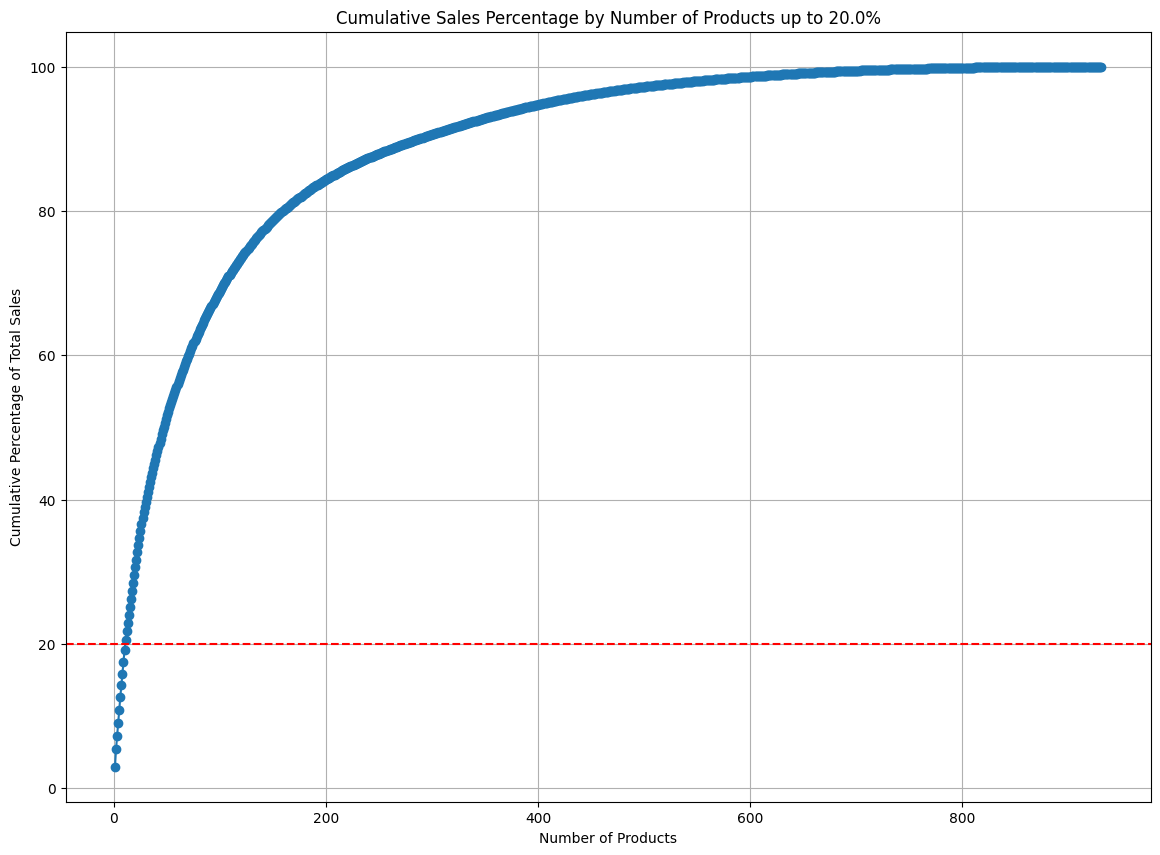

,Product_ID,Cumulative_Percentage
0,20001,2.96
1,20003,5.38
2,20007,7.22
3,20002,9.06
4,20004,10.82
5,20010,12.57
6,20008,14.22
7,20006,15.87
8,20005,17.52
9,20012,19.08


In [39]:

plot_cumsum(data, '2017-01', '2017-12', 0.2)